In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from PIL import Image
from torchvision import transforms # conda install pytorch torchvision -c pytorch

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

from model import EarthVisionModel

In [2]:
import os

git_home = os.getcwd() # get current directory 

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        _dict = pickle.load(fo, encoding='bytes')
    return _dict

label_meta = unpickle("./meta")

In [4]:
model = EarthVisionModel()

In [5]:
flag = np.zeros((32,256))

In [6]:
#####################################################
##                                                 ##
## This block takes some time to run (~20 minutes) ##
## So this is your sign to refill you coffee mug   ##
## ( -_-)☕~                                       ##
##                                                 ##
#####################################################

from tqdm import tqdm # this is a library for a progress bar 
from natsort import natsorted

model.load_state_dict(torch.load(f'{git_home}/state_dict.pt'))
model.eval() 


# getting meta data 
label_names = [a.decode() for a in label_meta[b'fine_label_names']]
things = [a.decode() for a in label_meta[b'label_map'][b'large_man-made_outdoor_things']]


# Load all image paths in test_dir folder
test_dir = f'{git_home}/test_X' # unzip before running
img_paths = [os.path.join(test_dir, f) for f in natsorted(os.listdir(test_dir))]
transform = transforms.ToTensor()

result = []

# Loop over the image paths and load each image
for path in tqdm(img_paths):
    img = Image.open(path)
    image = preprocess(img).unsqueeze(0)
    index = int(model(image).argmax())
    r = 0 if label_names[index] in things else 1
    result.append(r)

100%|███████████████████████████████████████| 8192/8192 [20:30<00:00,  6.66it/s]


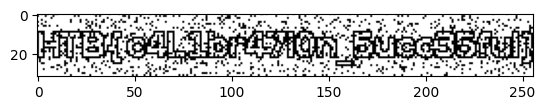

In [7]:
plt.imshow(1-np.array(result).reshape((32, 256)), cmap="gray")
plt.show()

**૮₍˶ •. • ⑅₎ა ♡ glockachu**